## 1. Importando bibliotecas

In [1]:
import polars as pl
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd

## 2. Lendo os CSVs

In [2]:
df_raw = pl.read_csv("data/exportacao_espumante.csv", separator=";", truncate_ragged_lines=True, encoding="utf-8")
df_raw.head()

Id,País,1970,1970_duplicated_0,1971,1971_duplicated_0,1972,1972_duplicated_0,1973,1973_duplicated_0,1974,1974_duplicated_0,1975,1975_duplicated_0,1976,1976_duplicated_0,1977,1977_duplicated_0,1978,1978_duplicated_0,1979,1979_duplicated_0,1980,1980_duplicated_0,1981,1981_duplicated_0,1982,1982_duplicated_0,1983,1983_duplicated_0,1984,1984_duplicated_0,1985,1985_duplicated_0,1986,1986_duplicated_0,1987,…,2005_duplicated_0,2006,2006_duplicated_0,2007,2007_duplicated_0,2008,2008_duplicated_0,2009,2009_duplicated_0,2010,2010_duplicated_0,2011,2011_duplicated_0,2012,2012_duplicated_0,2013,2013_duplicated_0,2014,2014_duplicated_0,2015,2015_duplicated_0,2016,2016_duplicated_0,2017,2017_duplicated_0,2018,2018_duplicated_0,2019,2019_duplicated_0,2020,2020_duplicated_0,2021,2021_duplicated_0,2022,2022_duplicated_0,2023,2023_duplicated_0
i64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1,"""África do Sul""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,44
2,"""Alemanha""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,2670,153,928,3547,10192,5423,20928,6648,29018,1958,6877,1976,12018,833,5072,5809,30461,9236,62169,6256,30939,4293,19088,4824,28799,4092,21373,1003,5466,2388,14767,142,265,1164,6560,162,1542
3,"""Angola""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,656,3314,6657,6293,26252,2244,10581,11393,33664,104138,672533,904,14196,73,1426,5850,21060,6866,22423,0,0,90,1010,0,0,63,280,1007,3615,24,38,0,0,26383,141588,56242,315073
4,"""Antigua e Barbuda""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,34,32,328,10,82,65,146,24,100
5,"""Antilhas Holandesas""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,…,0,0,0,0,0,0,0,180,1660,0,0,9144,65766,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df_pais = pl.read_csv("data/info_paises.csv", separator=";", encoding="iso-8859-1")
df_pais.head()

CO_PAIS,CO_PAIS_ISON3,iso_code,country,NO_PAIS_ING,continent,sub-region,intermediate-region
i64,i64,str,str,str,str,str,str
65,533,"""ABW""","""Aruba""","""Aruba""","""Americas""","""Latin America and the Caribbea…","""Caribbean"""
13,4,"""AFG""","""Afeganistão""","""Afghanistan""","""Asia""","""Southern Asia""",null
40,24,"""AGO""","""Angola""","""Angola""","""Africa""","""Sub-Saharan Africa""","""Middle Africa"""
41,660,"""AIA""","""Anguilla""","""Anguilla""","""Americas""","""Latin America and the Caribbea…","""Caribbean"""
15,248,"""ALA""","""Aland, Ilhas""","""Aland Islands""","""Europe""","""Northern Europe""",null


In [4]:
df_wwp = (
    pl.read_csv(
        "data/WPP2022_Demographic_Indicators_Medium.csv", infer_schema_length=10000
    )
    .select(
        pl.col("Time").alias("year"),
        pl.col("ISO3_code").alias("iso_code"),
        pl.col("TPopulation1Jan").alias("population"),
        pl.col("MedianAgePop").alias("median_age"),
        pl.col("PopDensity").alias("pop_density"),
        pl.col("PopSexRatio").alias("sex_ratio"),
    )
    .filter((pl.col("iso_code").is_not_null()) & (pl.col("year") < 2023))
    .sort("year")
)

df_wwp.head()

year,iso_code,population,median_age,pop_density,sex_ratio
i64,str,f64,f64,f64,f64
1950,"""BDI""",2229.322,18.3147,86.8637,91.9472
1950,"""COM""",159.959,20.0546,86.95,99.0369
1950,"""DJI""",61.361,15.5574,2.6891,98.5728
1950,"""ERI""",816.704,16.3182,6.7901,98.0364
1950,"""ETH""",17516.675,16.9074,17.71,98.5019


## 3. Tratamento dos dados

In [5]:
df_cleaned = (
    df_raw.melt(
        id_vars=["Id", "País"],
    )
    .with_columns(
        pl.col("variable")
        .str.extract(r"(\d{4})(_duplicated)?")
        .alias("year")
        .cast(pl.Int64)
    )
    .select(
        pl.col("País").alias("country"),
        pl.col(["year", "value"]),
        pl.when(pl.col("variable").str.contains("_duplicated"))
        .then(pl.lit("value"))
        .otherwise(pl.lit("liters"))
        .alias("type"),
    )
    .pivot(values="value", columns="type", index=["country", "year"])
    .join(df_pais, on="country", how="left")
    .join(df_wwp, on=["iso_code", "year"], how="left")
    .with_columns(
        (pl.col("liters") / pl.col("population")).alias("liters_per_capita"),
        (pl.col("value") / pl.col("liters")).alias("price_per_liter"),
    )
    .fill_nan(0)
    .fill_null(0)
)

df_cleaned.head()

country,year,liters,value,CO_PAIS,CO_PAIS_ISON3,iso_code,NO_PAIS_ING,continent,sub-region,intermediate-region,population,median_age,pop_density,sex_ratio,liters_per_capita,price_per_liter
str,i64,i64,i64,i64,i64,str,str,str,str,str,f64,f64,f64,f64,f64,f64
"""África do Sul""",1970,0,0,756,710,"""ZAF""","""South Africa""","""Africa""","""Sub-Saharan Africa""","""Southern Africa""",22034.44,17.8049,18.3225,102.0499,0.0,0.0
"""Alemanha""",1970,0,0,23,276,"""DEU""","""Germany""","""Europe""","""Western Europe""",null,78173.137,33.1123,224.623,89.6256,0.0,0.0
"""Angola""",1970,0,0,40,24,"""AGO""","""Angola""","""Africa""","""Sub-Saharan Africa""","""Middle Africa""",5966.7,15.4461,4.8365,104.165,0.0,0.0
"""Antigua e Barbuda""",1970,0,0,0,0,null,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0
"""Antilhas Holandesas""",1970,0,0,0,0,null,null,null,null,null,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_cleaned.write_csv("data/dataframe_final_espumante.csv")

In [7]:
df_cleaned.select(
    pl.lit("Brasil").alias("País de Origem"),
    pl.col("country").alias("País de Destino"),
    pl.col("year").alias("Ano de Referência"),
    pl.col("liters").alias("Quantidade de Espumante Exportado (Litros)"),
    pl.col("value").alias("Valor Total Exportado (US$)"),
)

País de Origem,País de Destino,Ano de Referência,Quantidade de Espumante Exportado (Litros),Valor Total Exportado (US$)
str,str,i64,i64,i64
"""Brasil""","""África do Sul""",1970,0,0
"""Brasil""","""Alemanha""",1970,0,0
"""Brasil""","""Angola""",1970,0,0
"""Brasil""","""Antigua e Barbuda""",1970,0,0
"""Brasil""","""Antilhas Holandesas""",1970,0,0
…,…,…,…,…
"""Brasil""","""Uruguai""",2023,2812,14352
"""Brasil""","""Vanuatu""",2023,0,0
"""Brasil""","""Venezuela""",2023,0,0


In [8]:
df_cleaned.columns

['country',
 'year',
 'liters',
 'value',
 'CO_PAIS',
 'CO_PAIS_ISON3',
 'iso_code',
 'NO_PAIS_ING',
 'continent',
 'sub-region',
 'intermediate-region',
 'population',
 'median_age',
 'pop_density',
 'sex_ratio',
 'liters_per_capita',
 'price_per_liter']

In [10]:
df_cleaned = df_cleaned.to_pandas()

## 4. Gráficos

#### 4.1 Valor exportado p/ ano x País

In [11]:
fig = px.line(df_cleaned, x="year", y="value", color="country")
fig.show()

c:\Users\eric.tanaka\AppData\Local\anaconda3\envs\pos-tech\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


#### 4.2 Valor exportado x Litros

In [12]:
fig = px.scatter(df_cleaned, x="liters", y="value", color="year")
fig.show()

#### 4.3 Valor total exportado x Ano

In [13]:
df_aux = df_cleaned.groupby("year")["value"].sum().reset_index()
fig = px.bar(df_aux, x="year", y="value")
fig.show()

#### 4.4 Valor total Exportado x Década

In [14]:
df_aux = (
    df_cleaned.assign(cut=lambda x: (x["year"] // 10 * 10))
    .groupby("cut")["value"]
    .sum()
    .reset_index()
)
fig = px.bar(df_aux, x="cut", y="value")
fig.show()

#### 4.5 Valor total Exportado x Continente

In [15]:
df_aux = (
    df_cleaned.groupby("continent")["value"]
    .sum()
    .reset_index()
    .sort_values("value", ascending=False)
)
fig = px.bar(df_aux, x="continent", y="value")
fig.show()

#### 4.6 Valor total Exportado x Pais

In [16]:
df_aux = df_cleaned.groupby(["continent", "iso_code"])["value"].sum().reset_index()

fig = px.scatter_geo(
    df_aux,
    locations="iso_code",
    size="value",
    color="continent",
    projection="orthographic",
)

fig.show()

c:\Users\eric.tanaka\AppData\Local\anaconda3\envs\pos-tech\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



#### 4.7 Valor total Exportado por Pais x ano

In [17]:
df_aux = df_cleaned.groupby(["continent", "iso_code", "year"])["value"].sum().reset_index()

fig = px.scatter_geo(
    df_aux,
    locations="iso_code",
    size="value",
    color="continent",
    projection="natural earth",
    animation_frame="year",
)

fig.show()

#### 4.8 Valor por litro no Ano x País

In [18]:
fig = px.line(df_cleaned, x="year", y="price_per_liter", color="country")
fig.show()

c:\Users\eric.tanaka\AppData\Local\anaconda3\envs\pos-tech\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



#### 4.9 Valor total Exportado x Continente

In [19]:
df_aux = (
    df_cleaned[df_cleaned["price_per_liter"] > 0]
    .groupby("continent")["price_per_liter"]
    .mean()
    .reset_index()
    .sort_values("price_per_liter", ascending=False)
)

fig = px.bar(df_aux, x="continent", y="price_per_liter")
fig.show()

#### 4.10 Litros Exportados x Idade Média

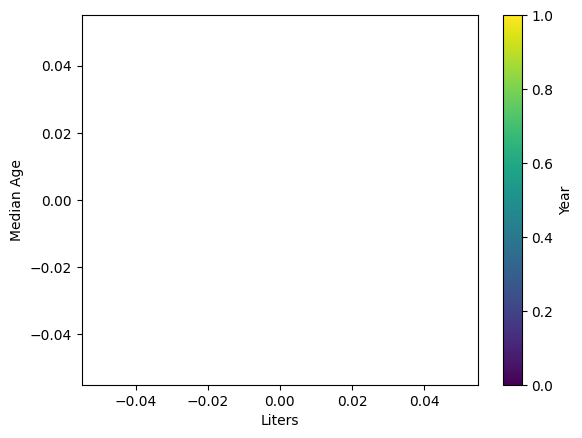

In [20]:
df_filtered = df_cleaned[df_cleaned["liters"] > 1000000]
plt.scatter(df_filtered["liters"], df_filtered["median_age"], c=df_filtered["year"])
plt.xlabel("Liters")
plt.ylabel("Median Age")
plt.colorbar(label="Year")
plt.show()

#### 4.11 Litros Exportados vs Sex Ratio

In [21]:
# Filter the DataFrame
filtered_df = df_cleaned[df_cleaned['liters'] > 1000]

# Create a scatter plot
fig = px.scatter(
    filtered_df,
    x="liters",
    y="sex_ratio",
    color="continent"
)

# Show the plot
fig.show()

c:\Users\eric.tanaka\AppData\Local\anaconda3\envs\pos-tech\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



#### 4.12 Litros Exportados vs Population Density

In [22]:
# Filter the DataFrame with multiple conditions
filtered_df = df_cleaned[(df_cleaned['liters'] > 10000) & (df_cleaned['liters'] < 100000)]

# Create a scatter plot
fig = px.scatter(
    filtered_df,
    y="liters",
    x="pop_density",
    color="continent"
)

# Show the plot
fig.show()

c:\Users\eric.tanaka\AppData\Local\anaconda3\envs\pos-tech\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



#### 4.13 Valor do Litro Exportado vs Média de Idade

In [23]:
# Filter the DataFrame
filtered_df = df_cleaned[df_cleaned['liters'] > 1000]

# Create a scatter plot
fig = px.scatter(
    filtered_df,
    y="price_per_liter",
    x="median_age",
    color="year"
)

# Show the plot
fig.show()

In [29]:
# Filter the DataFrame
filtered_df = df_cleaned[df_cleaned['liters'] > 1000]

# Calculate the correlation
correlation = filtered_df[['price_per_liter', 'median_age']].corr().iloc[0, 1]

print(correlation)

0.1883838218108606


#### 4.14 Valor Médio do Litro Exportado vs Média de Idade por Ano

In [24]:
# Filter the DataFrame
filtered_df = df_cleaned[df_cleaned['liters'] > 1000]

# Group by 'year' and calculate mean of 'price_per_liter' and 'median_age'
df_aux = filtered_df.groupby('year').agg(
    price_per_liter=('price_per_liter', 'mean'),
    median_age=('median_age', 'mean')
).reset_index()

# Create a scatter plot
fig = px.scatter(df_aux, y="price_per_liter", x="median_age", color="year")

# Show the plot
fig.show()

#### 4.15 Valor Médio do Litro Exportado vs Ano de Exportação

In [25]:
# Filter the DataFrame
filtered_df = df_cleaned[df_cleaned['liters'] > 1000]

# Group by 'continent' and 'year' and calculate mean of 'price_per_liter'
df_aux = filtered_df.groupby(['continent', 'year']).agg(
    price_per_liter=('price_per_liter', 'mean')
).reset_index()

# Create a scatter plot
fig = px.scatter(df_aux, y="price_per_liter", x="year", color="continent")

# Show the plot
fig.show()

c:\Users\eric.tanaka\AppData\Local\anaconda3\envs\pos-tech\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [32]:
# Filter the DataFrame
filtered_df = df_cleaned[df_cleaned['liters'] > 1000]

# Calculate the correlation
correlation = filtered_df[['price_per_liter', 'year']].corr().iloc[0, 1]

print(correlation)

0.4789383647220181


#### 4.16 outras possíveis correlações

In [26]:
# Filter the DataFrame
filtered_df = df_cleaned[df_cleaned['liters'] > 1000]

# Calculate the correlation matrix for numeric columns
correlation_matrix = filtered_df.corr(numeric_only=True)

# Apply a background gradient to the correlation matrix
styled_correlation_matrix = correlation_matrix.style.background_gradient(cmap="coolwarm")

styled_correlation_matrix

,year,liters,value,CO_PAIS,CO_PAIS_ISON3,population,median_age,pop_density,sex_ratio,liters_per_capita,price_per_liter
year,1.000000,0.067143,0.158188,0.134251,0.195201,0.142801,0.257422,0.129144,0.005820,-0.030019,0.456711
liters,0.067143,1.000000,0.877354,-0.001612,0.196951,0.103452,0.048160,-0.051963,0.056990,0.419484,-0.125341
value,0.158188,0.877354,1.000000,-0.027490,0.218442,0.133496,0.079298,-0.048786,0.036350,0.061252,-0.001052
CO_PAIS,0.134251,-0.001612,-0.027490,1.000000,0.844674,-0.115547,0.375151,0.042688,0.403471,0.121575,0.064272
CO_PAIS_ISON3,0.195201,0.196951,0.218442,0.844674,1.000000,-0.005088,0.476976,0.013081,0.420164,0.109804,0.093605
population,0.142801,0.103452,0.133496,-0.115547,-0.005088,1.000000,0.249623,-0.025177,0.189623,-0.069282,0.027007
median_age,0.257422,0.048160,0.079298,0.375151,0.476976,0.249623,1.000000,0.248536,0.784226,-0.003494,0.131089
pop_density,0.129144,-0.051963,-0.048786,0.042688,0.013081,-0.025177,0.248536,1.000000,0.104459,-0.008399,0.004935
sex_ratio,0.005820,0.056990,0.036350,0.403471,0.420164,0.189623,0.784226,0.104459,1.000000,0.128868,-0.096866
liters_per_capita,-0.030019,0.419484,0.061252,0.121575,0.109804,-0.069282,-0.003494,-0.008399,0.128868,1.000000,-0.138941


#### 4.17 Top N Paises

In [27]:
def agrupar_topn(df, n=5, var="value"):
    # Filter the DataFrame
    filtered_df = df[df['liters'] > 1000]
    
    # Select and group by 'country' and sum the 'var' column
    df_aux = (filtered_df.groupby('country')[var].sum()
              .reset_index().sort_values(by=var, ascending=False).head(n))

    list_topn = df_aux['country'].tolist()

    # Select and add 'group' column
    filtered_df['group'] = filtered_df['country'].apply(lambda x: x if x in list_topn else 'Outros')

    # Group by 'year' and 'group' and sum the 'var' column
    df_aux2 = filtered_df.groupby(['year', 'group'])[var].sum().reset_index()

    # Create a line plot
    fig = px.line(
        df_aux2,
        x="year",
        y=var,
        color="group",
        color_discrete_map={"Outros": "#ccc"},
        markers=True,
    )
    fig.show()

In [28]:
agrupar_topn(df_cleaned, n=10, var="value")

C:\Users\eric.tanaka\AppData\Local\Temp\ipykernel_22536\1959160345.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\eric.tanaka\AppData\Local\anaconda3\envs\pos-tech\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

